In [1]:
# Python ≥3.5 is required
import sys

import pandas as pd

assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target==0).astype(np.int32)
per_clf = Perceptron(max_iter=1000 , tol=1e-3 , random_state=42)
per_clf.fit(X,y)
y_pred = per_clf.predict([[2,0.5]])
print(y_pred)

[1]


Saving figure perceptron_iris_plot


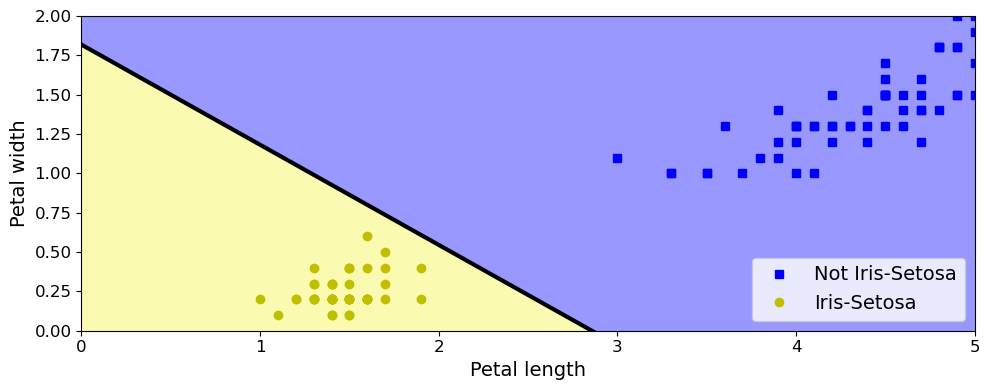

In [3]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

In [4]:
import tensorflow as tf
from tensorflow import keras
(tf.__version__)

'2.12.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full , y_train_full),(X_test , y_test)  = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid , X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test / 255.

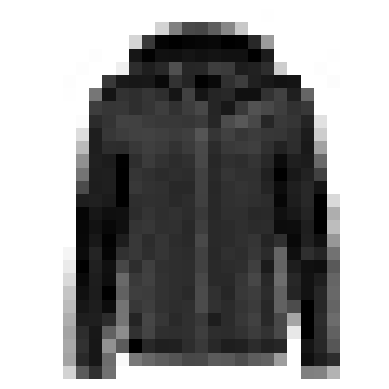

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


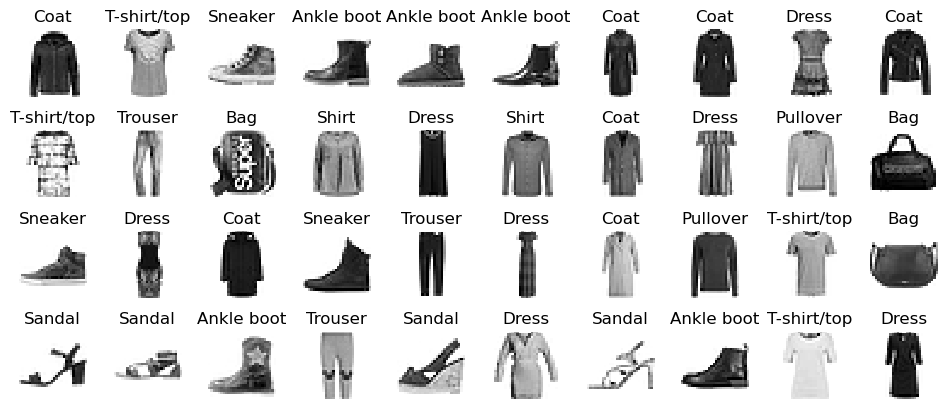

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300 , activation='relu'))
model.add(keras.layers.Dense(100 , activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [17]:
model = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.Dense(300 , activation='relu'),
     keras.layers.Dense(100 , activation='relu'),
     keras.layers.Dense(10, activation='softmax')
     ])

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


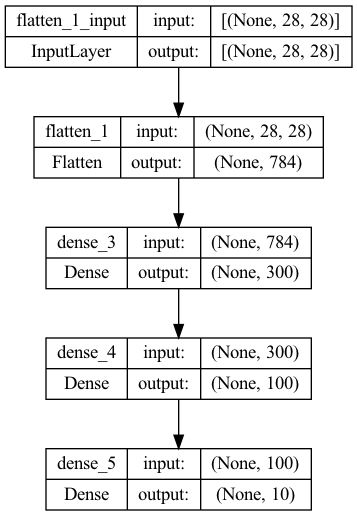

In [20]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file="my_fashion_mnist_model.png", show_shapes=True)

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [22]:
model.get_layer(hidden1.name) is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[-0.0184576 ,  0.06220953, -0.04323909, ..., -0.04690774,
         0.06580733, -0.04901001],
       [-0.06862292,  0.01184998, -0.03463405, ..., -0.01957521,
        -0.01094607, -0.02477379],
       [-0.03748167,  0.03670764, -0.04934866, ..., -0.01899428,
         0.02271371,  0.06703965],
       ...,
       [ 0.04515886,  0.05333342, -0.0597868 , ..., -0.06748916,
         0.0649087 ,  0.05522406],
       [ 0.03155206, -0.00387365, -0.06358209, ...,  0.03881092,
         0.07267563,  0.05457181],
       [ 0.04951847,  0.03584839, -0.07266035, ...,  0.00774939,
        -0.00159495, -0.03684252]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

In [28]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [29]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
   1/1719 [..............................] - ETA: 3:28 - loss: 2.4235 - accuracy: 0.0938

2024-03-26 16:51:08.449163: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 2s 847us/step - loss: 0.7252 - accuracy: 0.7659 - val_loss: 0.5430 - val_accuracy: 0.8032
Epoch 2/30
1719/1719 [==============================] - 1s 761us/step - loss: 0.4888 - accuracy: 0.8292 - val_loss: 0.4322 - val_accuracy: 0.8554
Epoch 3/30
1719/1719 [==============================] - 1s 730us/step - loss: 0.4436 - accuracy: 0.8437 - val_loss: 0.4186 - val_accuracy: 0.8574
Epoch 4/30
1719/1719 [==============================] - 1s 705us/step - loss: 0.4144 - accuracy: 0.8537 - val_loss: 0.3923 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 1s 713us/step - loss: 0.3944 - accuracy: 0.8602 - val_loss: 0.3857 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 1s 733us/step - loss: 0.3789 - accuracy: 0.8657 - val_loss: 0.3726 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 1s 745us/step - loss: 0.3669 - accuracy: 0.8693 - val_loss: 0.3599 - val_accura

In [30]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [31]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [32]:
history.history

{'loss': [0.7252010107040405,
  0.4888281524181366,
  0.44362929463386536,
  0.41438448429107666,
  0.39441782236099243,
  0.37888103723526,
  0.3669249415397644,
  0.35493484139442444,
  0.3457864820957184,
  0.3356856405735016,
  0.32776308059692383,
  0.32018956542015076,
  0.3133598268032074,
  0.30683329701423645,
  0.3004416227340698,
  0.2945322096347809,
  0.2891134023666382,
  0.28249433636665344,
  0.27810829877853394,
  0.2751847505569458,
  0.2692969739437103,
  0.2646932601928711,
  0.2602750062942505,
  0.2559260427951813,
  0.25191259384155273,
  0.24714796245098114,
  0.24393780529499054,
  0.2400602400302887,
  0.23535847663879395,
  0.23183858394622803],
 'accuracy': [0.765927255153656,
  0.8292363882064819,
  0.8436545729637146,
  0.8537091016769409,
  0.8602181673049927,
  0.8656908869743347,
  0.8692727088928223,
  0.8741999864578247,
  0.8772181868553162,
  0.879909098148346,
  0.8832545280456543,
  0.8847454786300659,
  0.8870545625686646,
  0.8899999856948853,
 

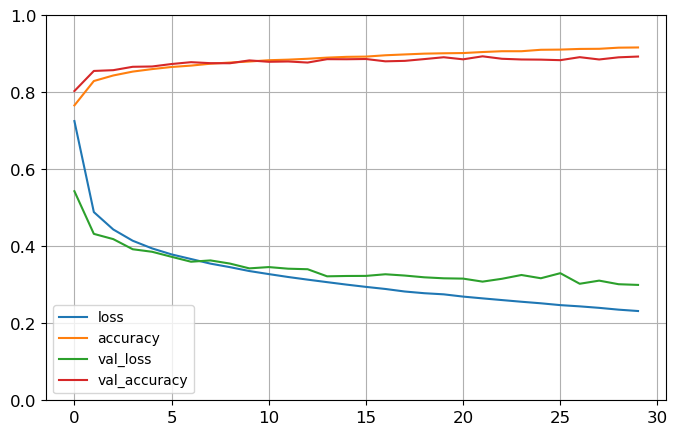

In [33]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 652us/step - loss: 0.3321 - accuracy: 0.8809


[0.33210018277168274, 0.8809000253677368]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 31ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 7ms/step


array([9, 2, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


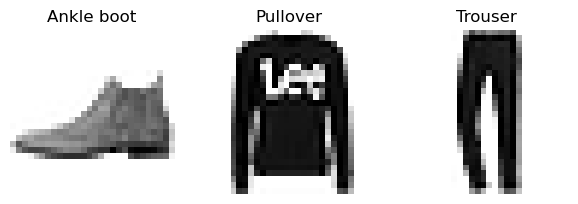

In [39]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [76]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = housing.data
y = housing.target
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [77]:
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 394us/step - loss: 2.0091 - val_loss: 0.9007
Epoch 2/20
363/363 [==============================] - 0s 296us/step - loss: 0.7967 - val_loss: 0.7293
Epoch 3/20
363/363 [==============================] - 0s 285us/step - loss: 0.7023 - val_loss: 0.6534
Epoch 4/20
363/363 [==============================] - 0s 324us/step - loss: 0.6622 - val_loss: 0.6294
Epoch 5/20
363/363 [==============================] - 0s 362us/step - loss: 0.6312 - val_loss: 0.6053
Epoch 6/20
363/363 [==============================] - 0s 345us/step - loss: 0.6045 - val_loss: 0.5722
Epoch 7/20
363/363 [==============================] - 0s 324us/step - loss: 0.5813 - val_loss: 0.5465
Epoch 8/20
363/363 [==============================] - 0s 317us/step - loss: 0.5612 - val_loss: 0.5364
Epoch 9/20
363/363 [==============================] - 0s 374us/step - loss: 0.5429 - val_loss: 0.5118
Epoch 10/20
363/363 [==============================] - 0s 329us/step - loss: 0.527

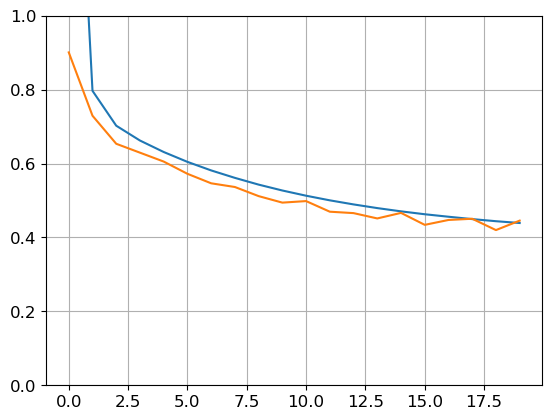

In [79]:
plt.plot(pd.DataFrame(history.history))
plt.grid("True")
plt.gca().set_ylim(0,1)
plt.show()

In [80]:
y_pred

array([[0.62758064],
       [1.6011529 ],
       [3.172423  ]], dtype=float32)

In [81]:
input = keras.layers.Input(shape= X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input], outputs = [output])

In [82]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [83]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 437us/step - loss: 1.9101 - val_loss: 1.7369
Epoch 2/20
363/363 [==============================] - 0s 316us/step - loss: 0.7134 - val_loss: 0.6850
Epoch 3/20
363/363 [==============================] - 0s 348us/step - loss: 0.6503 - val_loss: 0.7210
Epoch 4/20
363/363 [==============================] - 0s 339us/step - loss: 0.6154 - val_loss: 0.5917
Epoch 5/20
363/363 [==============================] - 0s 359us/step - loss: 0.5862 - val_loss: 0.5797
Epoch 6/20
363/363 [==============================] - 0s 315us/step - loss: 0.5596 - val_loss: 0.5784
Epoch 7/20
363/363 [==============================] - 0s 335us/step - loss: 0.5415 - val_loss: 0.5496
Epoch 8/20
363/363 [==============================] - 0s 324us/step - loss: 0.5247 - val_loss: 0.5503
Epoch 9/20
363/363 [==============================] - 0s 327us/step - loss: 0.5072 - val_loss: 0.4980
Epoch 10/20
363/363 [==============================] - 0s 353us/step - loss: 0.494

In [84]:
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [86]:
model.compile(loss="mse", optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 450us/step - loss: 2.3501 - val_loss: 1.0899
Epoch 2/20
363/363 [==============================] - 0s 345us/step - loss: 0.9537 - val_loss: 0.8490
Epoch 3/20
363/363 [==============================] - 0s 333us/step - loss: 0.7813 - val_loss: 0.6952
Epoch 4/20
363/363 [==============================] - 0s 323us/step - loss: 0.7016 - val_loss: 0.6461
Epoch 5/20
363/363 [==============================] - 0s 334us/step - loss: 0.6518 - val_loss: 0.5958
Epoch 6/20
363/363 [==============================] - 0s 343us/step - loss: 0.6150 - val_loss: 0.5582
Epoch 7/20
363/363 [==============================] - 0s 326us/step - loss: 0.5864 - val_loss: 0.5334
Epoch 8/20
363/363 [==============================] - 0s 369us/step - loss: 0.5635 - val_loss: 0.5155
Epoch 9/20
363/363 [==============================] - 0s 331us/step - loss: 0.5441 - val_loss: 0.4963
Epoch 10/20
363/363 [==============================] - 0s 325us/step - loss: 0.528

In [87]:
np.random.seed(42)
tf.random.set_seed(42)

In [88]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [89]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-3))

In [90]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 550us/step - loss: 3.1191 - main_output_loss: 2.8879 - aux_output_loss: 5.1998 - val_loss: 4.5779 - val_main_output_loss: 4.1768 - val_aux_output_loss: 8.1877
Epoch 2/20
363/363 [==============================] - 0s 392us/step - loss: 1.1360 - main_output_loss: 0.8800 - aux_output_loss: 3.4393 - val_loss: 2.0636 - val_main_output_loss: 1.4068 - val_aux_output_loss: 7.9746
Epoch 3/20
363/363 [==============================] - 0s 386us/step - loss: 0.8515 - main_output_loss: 0.6698 - aux_output_loss: 2.4869 - val_loss: 1.3389 - val_main_output_loss: 0.6241 - val_aux_output_loss: 7.7723
Epoch 4/20
363/363 [==============================] - 0s 396us/step - loss: 0.7487 - main_output_loss: 0.6133 - aux_output_loss: 1.9676 - val_loss: 1.2877 - val_main_output_loss: 0.5890 - val_aux_output_loss: 7.5758
Epoch 5/20
363/363 [==============================] - 0s 381us/step - loss: 0.6941 - main_output_loss: 0.5839 - aux_output_loss: 1.6861 

In [91]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 22ms/step


In [92]:
print(total_loss, main_loss, aux_loss)
print(y_pred_main, y_pred_aux)

0.4856188893318176 0.43014857172966003 0.9848535060882568
[[0.42122793]
 [1.7935717 ]
 [3.4440687 ]] [[1.3129184]
 [1.7737756]
 [2.589292 ]]


In [93]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [94]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B)) 

Epoch 1/10
363/363 [==============================] - 0s 555us/step - loss: 2.4159 - output_1_loss: 2.0609 - output_2_loss: 5.6113 - val_loss: 1.4656 - val_output_1_loss: 1.1289 - val_output_2_loss: 4.4960
Epoch 2/10
363/363 [==============================] - 0s 387us/step - loss: 1.1250 - output_1_loss: 0.8333 - output_2_loss: 3.7504 - val_loss: 0.9959 - val_output_1_loss: 0.7633 - val_output_2_loss: 3.0893
Epoch 3/10
363/363 [==============================] - 0s 384us/step - loss: 0.9385 - output_1_loss: 0.7504 - output_2_loss: 2.6311 - val_loss: 0.9317 - val_output_1_loss: 0.7155 - val_output_2_loss: 2.8776
Epoch 4/10
363/363 [==============================] - 0s 383us/step - loss: 0.8436 - output_1_loss: 0.7066 - output_2_loss: 2.0759 - val_loss: 0.8956 - val_output_1_loss: 0.6665 - val_output_2_loss: 2.9574
Epoch 5/10
363/363 [==============================] - 0s 369us/step - loss: 0.7806 - output_1_loss: 0.6691 - output_2_loss: 1.7839 - val_loss: 0.8658 - val_output_1_loss: 0.635

In [95]:
np.random.seed(42)
tf.random.set_seed(42)

In [96]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])   

In [97]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 420us/step - loss: 2.5723 - val_loss: 1.2404
Epoch 2/10
363/363 [==============================] - 0s 301us/step - loss: 0.9364 - val_loss: 1.5701
Epoch 3/10
363/363 [==============================] - 0s 300us/step - loss: 0.7190 - val_loss: 0.6978
Epoch 4/10
363/363 [==============================] - 0s 303us/step - loss: 0.6417 - val_loss: 0.5886
Epoch 5/10
363/363 [==============================] - 0s 303us/step - loss: 0.6029 - val_loss: 0.5597
Epoch 6/10
363/363 [==============================] - 0s 307us/step - loss: 0.5709 - val_loss: 0.5240
Epoch 7/10
363/363 [==============================] - 0s 304us/step - loss: 0.5457 - val_loss: 0.4988
Epoch 8/10
363/363 [==============================] - 0s 300us/step - loss: 0.5226 - val_loss: 0.4965
Epoch 9/10
363/363 [==============================] - 0s 313us/step - loss: 0.5017 - val_loss: 0.4688
Epoch 10/10
162/162 [==============================] - 0s 207us/step - loss: 0.465

In [98]:
mse_test

0.4657672643661499

In [99]:
model.save("my_keras_model.h5")
model = keras.models.load_model("my_keras_model.h5")
model.predict(X_new)

1/1 [==============================] - 0s 17ms/step


array([[0.9900912],
       [1.5082492],
       [3.2121248]], dtype=float32)

In [100]:
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

In [101]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [102]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [103]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 418us/step - loss: 2.1245 - val_loss: 1.0558
Epoch 2/10
363/363 [==============================] - 0s 300us/step - loss: 0.7801 - val_loss: 1.1264
Epoch 3/10
363/363 [==============================] - 0s 311us/step - loss: 0.6796 - val_loss: 0.8951
Epoch 4/10
363/363 [==============================] - 0s 308us/step - loss: 0.6262 - val_loss: 0.6413
Epoch 5/10
363/363 [==============================] - 0s 312us/step - loss: 0.5838 - val_loss: 0.5603
Epoch 6/10
363/363 [==============================] - 0s 329us/step - loss: 0.5470 - val_loss: 0.5382
Epoch 7/10
363/363 [==============================] - 0s 309us/step - loss: 0.5173 - val_loss: 0.5225
Epoch 8/10
363/363 [==============================] - 0s 307us/step - loss: 0.4927 - val_loss: 0.4590
Epoch 9/10
363/363 [==============================] - 0s 309us/step - loss: 0.4723 - val_loss: 0.4433
Epoch 10/10
162/162 [==============================] - 0s 208us/step - loss: 0.448

In [104]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, 
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 404us/step - loss: 0.4438 - val_loss: 0.4099
Epoch 2/100
363/363 [==============================] - 0s 310us/step - loss: 0.4335 - val_loss: 0.4026
Epoch 3/100
363/363 [==============================] - 0s 320us/step - loss: 0.4257 - val_loss: 0.3949
Epoch 4/100
363/363 [==============================] - 0s 298us/step - loss: 0.4191 - val_loss: 0.3995
Epoch 5/100
363/363 [==============================] - 0s 309us/step - loss: 0.4143 - val_loss: 0.3912
Epoch 6/100
363/363 [==============================] - 0s 300us/step - loss: 0.4098 - val_loss: 0.4013
Epoch 7/100
363/363 [==============================] - 0s 306us/step - loss: 0.4066 - val_loss: 0.3997
Epoch 8/100
363/363 [==============================] - 0s 309us/step - loss: 0.4036 - val_loss: 0.3846
Epoch 9/100
363/363 [==============================] - 0s 295us/step - loss: 0.4007 - val_loss: 0.3973
Epoch 10/100
363/363 [==============================] - 0s 297us/step - l

In [105]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [106]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train , y_train , epochs = 1,
                    validation_data=(X_valid , y_valid),
                    callbacks = [val_train_ratio_cb])

218/363 [=================>............] - ETA: 0s - loss: 0.3498
val/train: 1.00
363/363 [==============================] - 0s 334us/step - loss: 0.3456 - val_loss: 0.3457


In [108]:
print(X.shape , y.shape)

(20640, 8) (20640,)


In [109]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [110]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2024_03_26-17_53_30'